<class 'pandas.core.frame.DataFrame'>
Int64Index: 6347 entries, 0 to 6346
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Price                 6347 non-null   int64 
 1   Area                  6347 non-null   int64 
 2   Location              6347 non-null   object
 3   No. of Bedrooms       6347 non-null   int64 
 4   New/Resale            6347 non-null   int64 
 5   Gymnasium             6347 non-null   int64 
 6   Lift Available        6347 non-null   int64 
 7   Car Parking           6347 non-null   int64 
 8   Maintenance Staff     6347 non-null   int64 
 9   24x7 Security         6347 non-null   int64 
 10  Children's Play Area  6347 non-null   int64 
 11  Clubhouse             6347 non-null   int64 
 12  Intercom              6347 non-null   int64 
 13  Landscaped Gardens    6347 non-null   int64 
 14  Indoor Games          6347 non-null   int64 
 15  Gas Connection        6347 non-null   

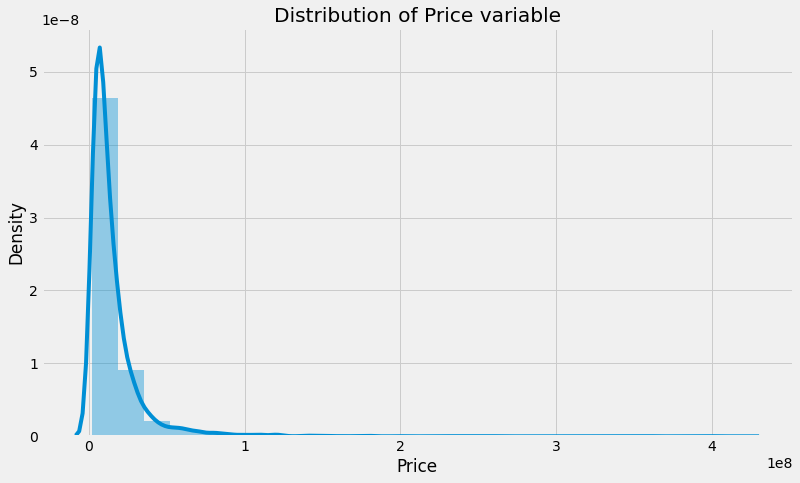

skew is: 6.823590994567408


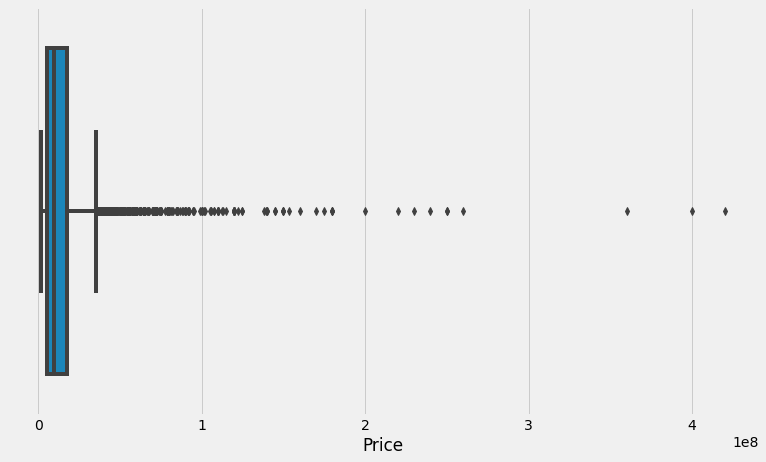

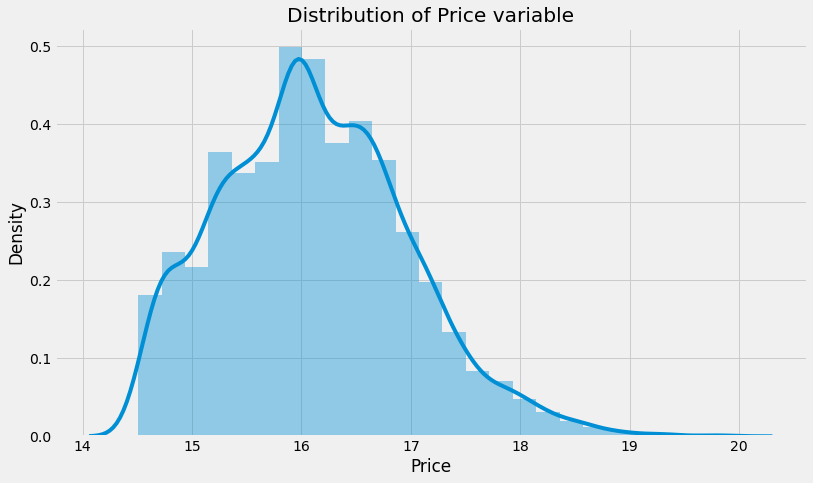

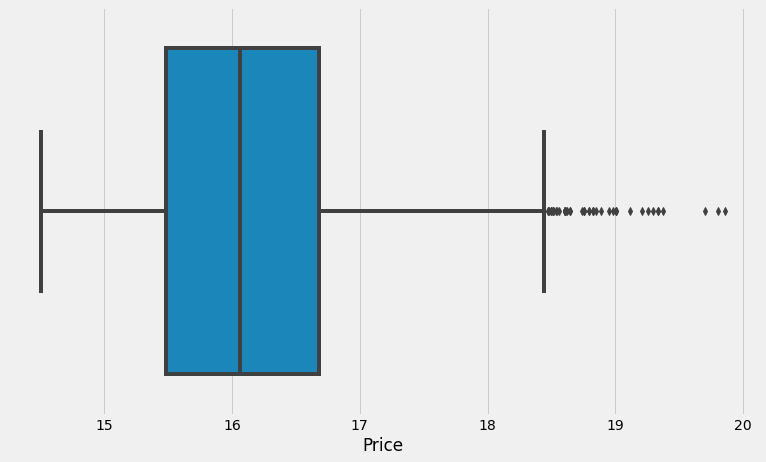

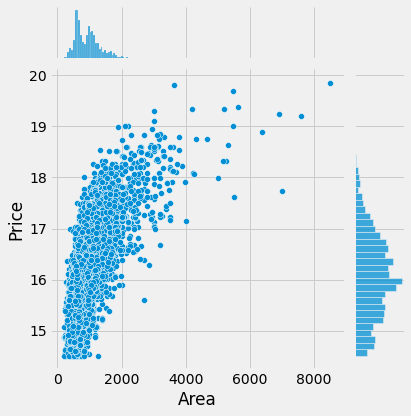

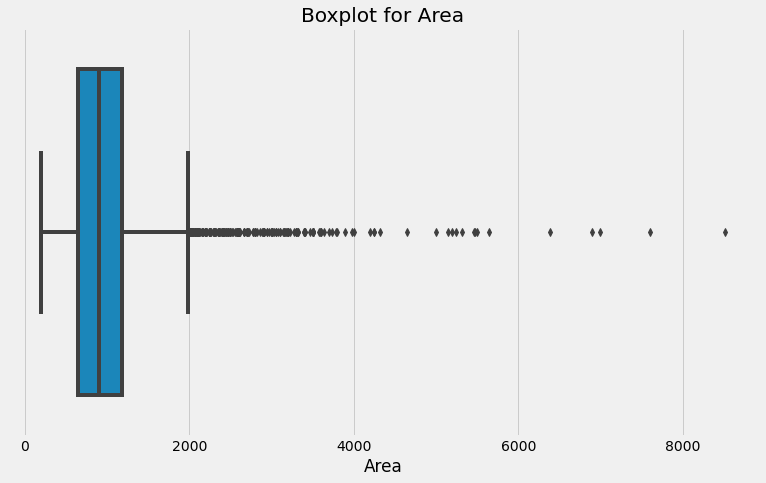

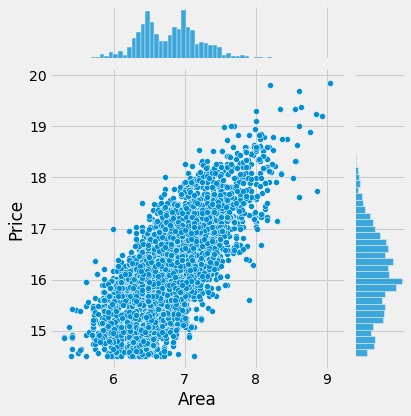

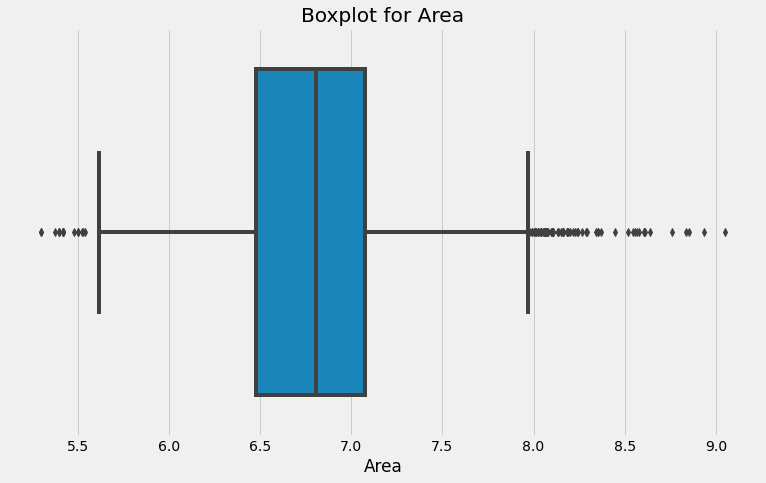

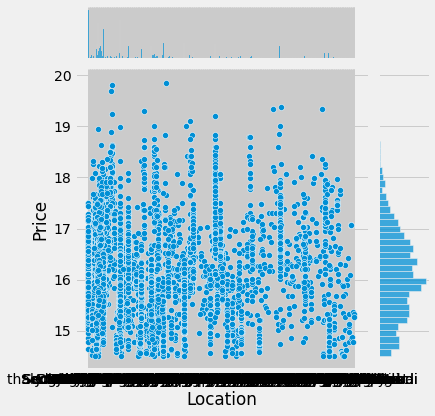

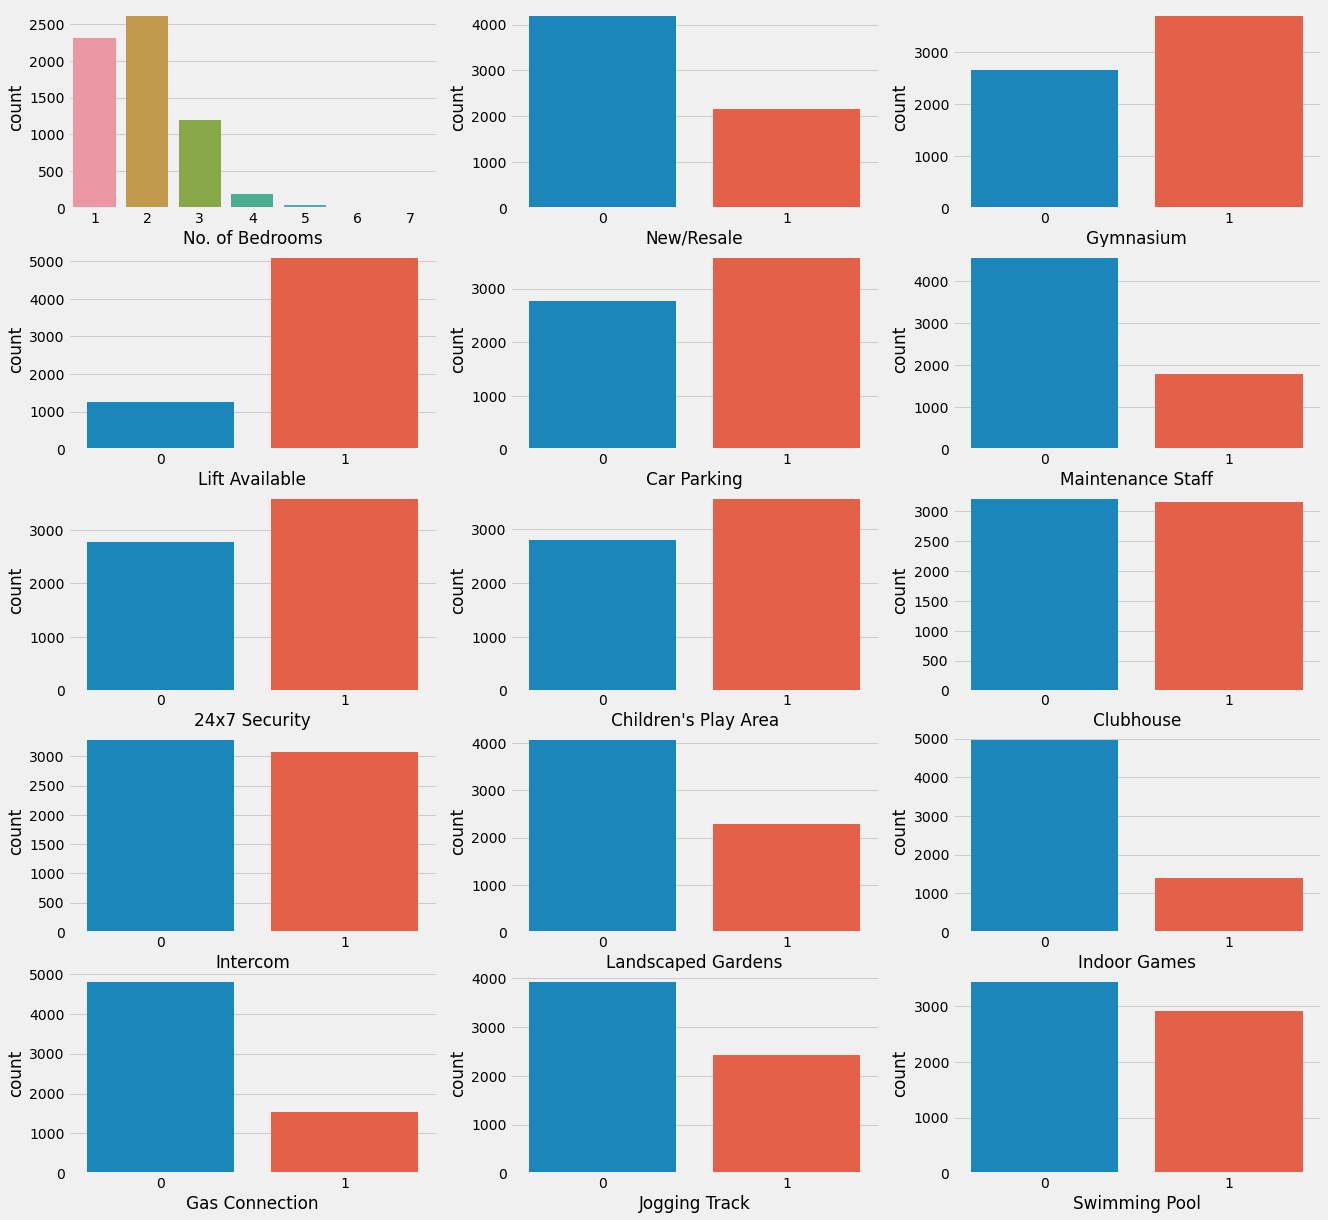

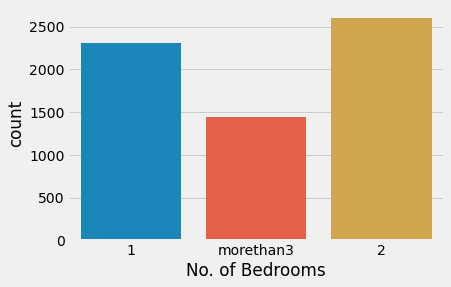

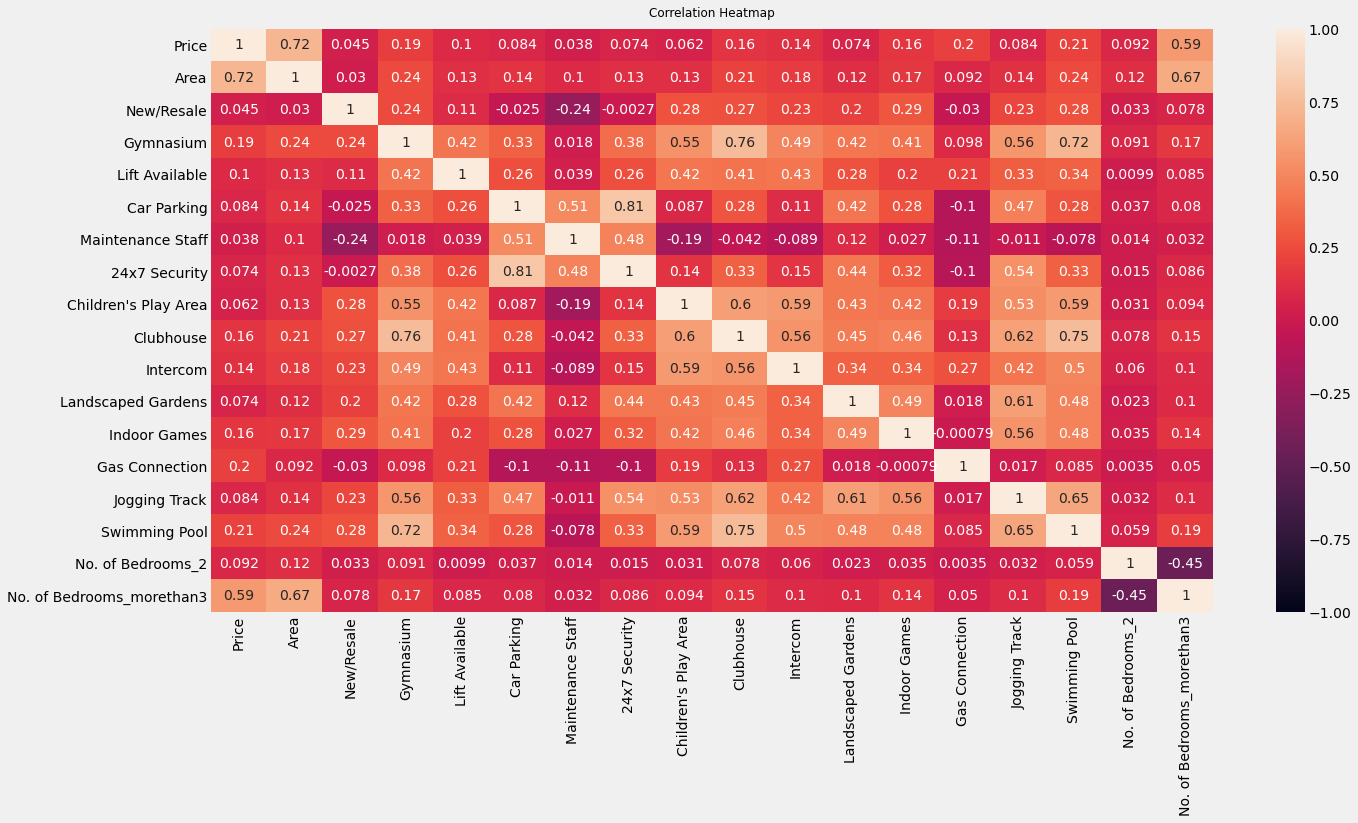

In [1]:
%run DataPreprocessing.ipynb

## Standardizing Predictor Variables

In [2]:
from sklearn import preprocessing

In [3]:
scaler= preprocessing.StandardScaler().fit(X_train)
X_train_s= scaler.transform(X_train)

In [4]:
scaler= preprocessing.StandardScaler().fit(X_test)
X_test_s= scaler.transform(X_test)

## Building Model: Ridge Regression 

In [5]:
from sklearn.linear_model import Ridge

In [6]:
from sklearn.model_selection import validation_curve

In [7]:
#logspace will create 100 values between 10^-2 to 10^8
param_range= np.logspace(-2,8,100)

In [8]:
#training model
train_scores, test_scores= validation_curve(Ridge(),X_train_s,y_train,"alpha",param_range,scoring='r2') 

In [9]:
#we got 3 values for each lambda(here alpha), so we will use mean
train_mean= np.mean(train_scores,axis=1)
test_mean= np.mean(test_scores,axis=1)

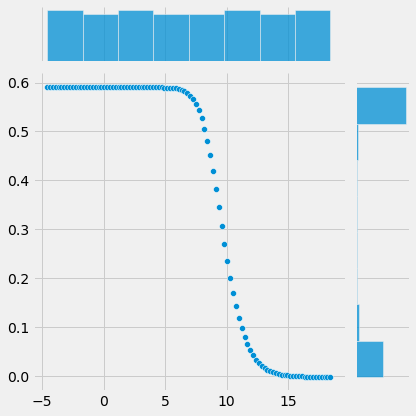

In [10]:
sns.jointplot(x=np.log(param_range),y=test_mean)

In [11]:
#we want to find out array for which test_mean value is max
np.where(test_mean==max(test_mean))

(array([34], dtype=int64),)

In [12]:
param_range[34] #now we have lambda value for which r2 value is max

27.1858824273294

In [13]:
reg_bestridge=Ridge(alpha=param_range[34])

In [14]:
reg_bestridge.fit(X_train_s,y_train)

Ridge(alpha=27.1858824273294)

### Evaluating Performance 

In [15]:
from sklearn.metrics import r2_score

In [16]:
r2_score(y_train,reg_bestridge.predict(X_train_s))

0.5934976086215515

In [17]:
r2_score(y_test,reg_bestridge.predict(X_test_s)) #rsquared value for test data

0.6007241515853912

In [30]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, reg_bestridge.predict(X_test_s)))  
print('MSE:', metrics.mean_squared_error(y_test, reg_bestridge.predict(X_test_s)))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, reg_bestridge.predict(X_test_s)))) #The lower the RMSE, the better the model
print('VarScore:',metrics.explained_variance_score(y_test,reg_bestridge.predict(X_test_s)))

MAE: 0.43964201508097034
MSE: 0.2966611892148842
RMSE: 0.5446661263699848
VarScore: 0.6026887962040501


Text(0, 0.5, 'Predicted Y')

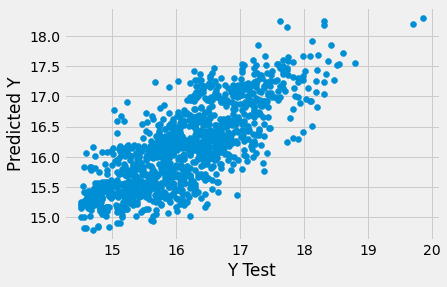

In [32]:
#scatter plot for y_test and predicted y
plt.scatter(y_test,reg_bestridge.predict(X_test_s))
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Building Model: Lasso Regression

In [18]:
from sklearn.linear_model import Lasso

In [19]:
#training model
train_scores, test_scores= validation_curve(Lasso(),X_train_s,y_train,"alpha",param_range,scoring='r2') 

In [20]:
#we got 3 values for each lambda(here alpha), so we will use mean
train_mean= np.mean(train_scores,axis=1)
test_mean= np.mean(test_scores,axis=1)

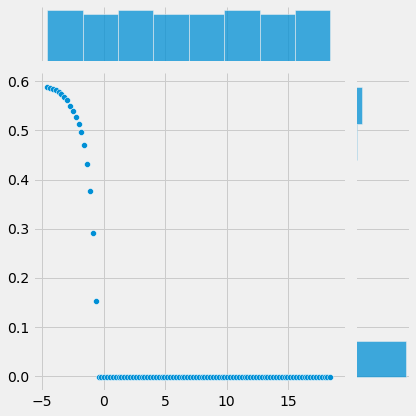

In [21]:
sns.jointplot(x=np.log(param_range),y=test_mean)

In [22]:
#we want to find out array for which test_mean value is max
np.where(test_mean==max(test_mean))

(array([0], dtype=int64),)

In [23]:
param_range[0] #now we have lambda value for which r2 value is max

0.01

In [24]:
reg_bestLasso=Lasso(alpha=param_range[0])

In [25]:
reg_bestLasso.fit(X_train_s,y_train)

Lasso(alpha=0.01)

### Evaluating Performance 

In [26]:
from sklearn.metrics import r2_score

In [27]:
r2_score(y_train,reg_bestLasso.predict(X_train_s))

0.5902587049851787

In [28]:
r2_score(y_test,reg_bestLasso.predict(X_test_s)) #rsquared value for test data

0.5973624177657393

In [31]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, reg_bestLasso.predict(X_test_s)))  
print('MSE:', metrics.mean_squared_error(y_test, reg_bestLasso.predict(X_test_s)))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, reg_bestLasso.predict(X_test_s)))) #The lower the RMSE, the better the model
print('VarScore:',metrics.explained_variance_score(y_test,reg_bestLasso.predict(X_test_s)))

MAE: 0.44390509668727274
MSE: 0.2991589509921661
RMSE: 0.5469542494506886
VarScore: 0.5993270623843983


Text(0, 0.5, 'Predicted Y')

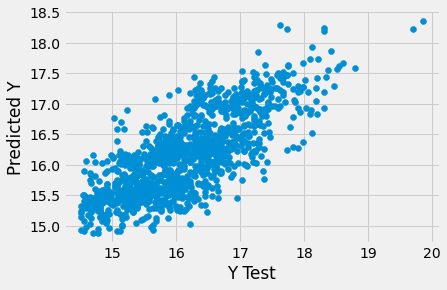

In [33]:
#scatter plot for y_test and predicted y
plt.scatter(y_test,reg_bestLasso.predict(X_test_s))
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Hence Ridge(0.6007) gives higher performance than Lasso(0.5973) for our dataset